In [1]:
# Add the shared code directory to the module search path
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir, 'shared_code')))

from pauli_channel_approximation import PCA

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

In [112]:
import dill
data = {'sparsity':{}, 'agi':{}}
sample_values = [0,'1e-15','1e-10', '1e-07', '1e-05', '0.001']
for ind, eta in enumerate(sample_values):
    with open(f'sparsity{eta}.pkl', 'rb') as f:
        data['sparsity'][eta] = dill.load(f)
    with open(f'agi{ind}.pkl', 'rb') as f:
        data['agi'][eta] = dill.load(f)

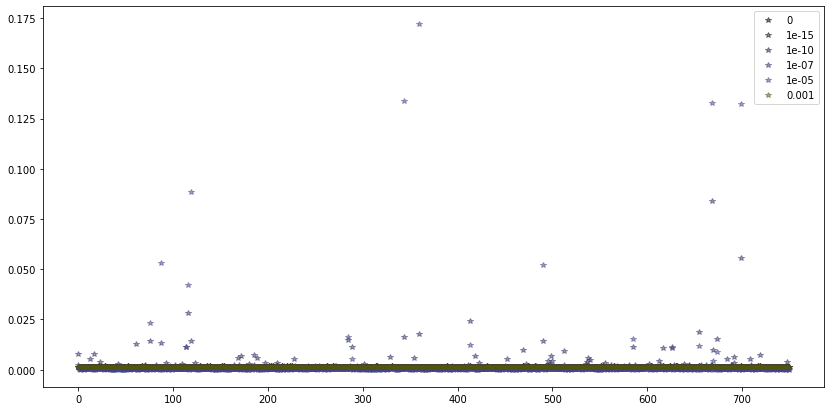

In [113]:
plt.figure(figsize=(14,7))
for ind,eta in enumerate(sample_values):
    plt.plot(np.arange(750), data['agi'][eta]['weights'][1].T.tolist()[0], 
             '*', color=f'#{ind}{ind}{ind}{ind}{2*ind}{2*ind}', alpha=.5, label=eta)
plt.legend()

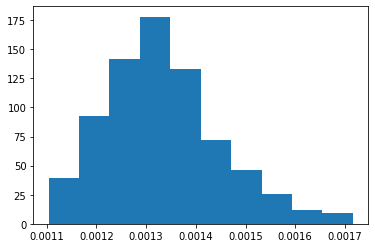

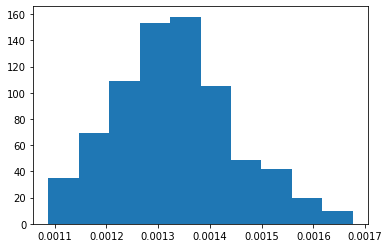

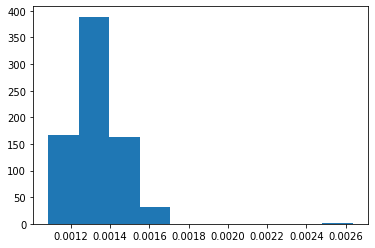

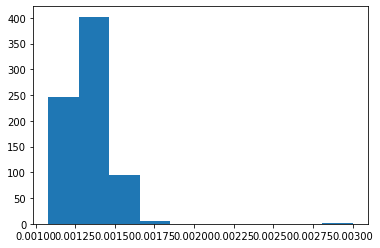

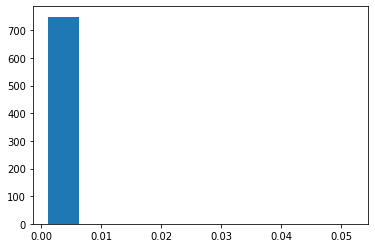

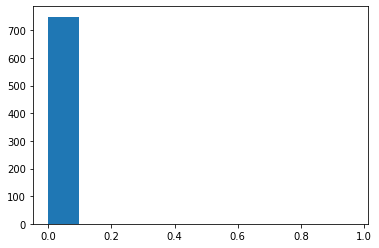

In [114]:
for ind,eta in enumerate(sample_values):
    plt.hist(data['sparsity'][eta]['weights'][1].T.tolist()[0])
    plt.show()

In [115]:
smallest = np.min([v['weights'] for v in data['sparsity'].values()])
largest = np.max([v['weights'] for v in data['sparsity'].values()])

In [116]:
[v['weights'] for v in data['sparsity'].values()]

[(matrix([[-7.88669852e-11],
          [-4.27272489e-11],
          [-1.26142922e-11],
          [ 6.29650876e-11],
          [ 1.79400925e-11],
          [-4.28743550e-11],
          [ 1.37016849e-12],
          [-3.32098623e-11],
          [-1.67045183e-11],
          [-2.08968832e-11],
          [ 8.95080022e-12],
          [-6.25459869e-11],
          [-4.20013839e-11],
          [ 6.69263392e-12],
          [-3.87774233e-11],
          [-2.49525830e-11],
          [ 9.22876048e-11],
          [-3.00185395e-11],
          [ 1.16215601e-11],
          [ 1.87066508e-11],
          [-3.26423337e-11],
          [-2.20396052e-11],
          [-2.84090499e-11],
          [-5.10229467e-11],
          [-3.55982403e-11],
          [ 2.51115982e-11],
          [ 1.63068541e-11],
          [ 1.96749983e-11],
          [ 4.07204942e-11],
          [-2.90286549e-12],
          [-2.50113652e-11],
          [ 5.39408625e-11],
          [-2.39427790e-11],
          [-1.59229861e-11],
          [-6.

IndexError: list index out of range

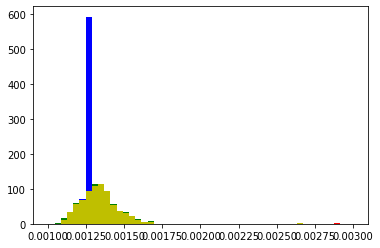

In [117]:
from matplotlib.ticker import FormatStrFormatter
fig, ax = plt.subplots()
colors = ['r','b','g','y']
for ind,eta in enumerate(sample_values[::-1]):
    ax.hist(data['sparsity'][eta]['weights'][1].T.tolist()[0], color=colors[ind], label=eta,
           bins=np.linspace(.001,.003,50))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.4f'))
plt.legend()
plt.ylabel("Number of Controls")
plt.xlabel('Probability')
plt.savefig("sparisity-versus-parameter.png")
plt.show()

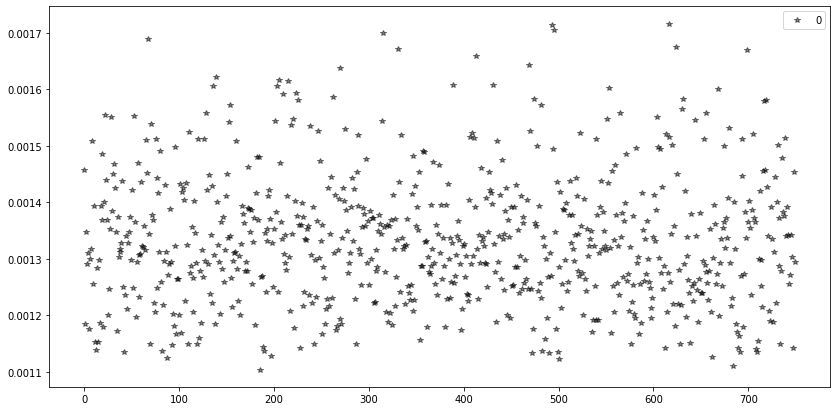

In [8]:
plt.figure(figsize=(14,7))
for ind,eta in enumerate([0]):
    plt.plot(np.arange(750), data['sparsity'][eta]['weights'][1].T.tolist()[0], 
             '*', color=f'#{ind}{ind}{ind}{ind}{2*ind}{2*ind}', alpha=.5, label=eta)
plt.legend()

In [9]:
for ind,eta in enumerate(sample_values):
    weights = np.array(data['agi'][eta]['weights'][0].T.tolist()[0])
    print(data['agi'][eta]['param'], list(zip(np.round(weights[weights>0.02],3), np.where(weights > 0.02)[0])))
    

0 [(0.065, 61), (0.484, 112), (0.108, 203), (0.25, 301), (0.093, 669)]
0.0001 [(0.065, 61), (0.484, 112), (0.108, 203), (0.25, 301), (0.093, 669)]
0.001 [(0.065, 61), (0.484, 112), (0.108, 203), (0.25, 301), (0.093, 669)]
0.01 [(0.065, 61), (0.484, 112), (0.108, 203), (0.25, 301), (0.093, 669)]
0.1 [(0.065, 61), (0.484, 112), (0.108, 203), (0.25, 301), (0.093, 669)]


In [10]:
for ind,eta in enumerate(sample_values):
    weights = np.array(data['sparsity'][eta]['weights'][0].T.tolist()[0])
    print(data['sparsity'][eta]['param'], list(zip(np.round(weights[weights>0.02],3), np.where(weights > 0.02)[0])))
    

0 [(0.065, 61), (0.484, 112), (0.108, 203), (0.25, 301), (0.093, 669)]
1e-07 [(0.065, 61), (0.484, 112), (0.108, 203), (0.25, 301), (0.093, 669)]
1e-10 [(0.065, 61), (0.484, 112), (0.108, 203), (0.25, 301), (0.093, 669)]
1e-12 [(0.065, 61), (0.484, 112), (0.108, 203), (0.25, 301), (0.093, 669)]
1e-15 [(0.065, 61), (0.484, 112), (0.108, 203), (0.25, 301), (0.093, 669)]
